### Importing Necessary Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, resample
import os

### Clearing the Target Directories

In [9]:
directory_path_list = ["FilteredData","RawProcessedData"]
for directory_path in directory_path_list:
    for file in os.listdir(f"./{directory_path}"):
        os.remove(os.path.join(directory_path, file))

### Plot Function

In [10]:
def plot(data):
    fig,axes = plt.subplots(nrows=1,ncols=3,sharey=True,figsize=(15,5))
    axes[0].plot(data["gFx"],"blue")
    axes[1].plot(data["gFy"],"red")
    axes[2].plot(data["gFz"],"green")
    plt.show()

### Trim Function to Trim the Data into 500 Datapoints

In [11]:
def trim_data(data):
    trimmed_data = data.drop(data.index[:250])
    trimmed_data = trimmed_data.drop(trimmed_data.index[500:])
    trimmed_data = trimmed_data.reset_index()
    trimmed_data = trimmed_data.drop("index",axis = 1)
    return trimmed_data

### Storing the Resampled Raw Data and Resampled Filtered Data into Target Directory

*Making X_data_test and y_data_test for testing the Human Activity Recognition Model*

Data 1

Filtered Data



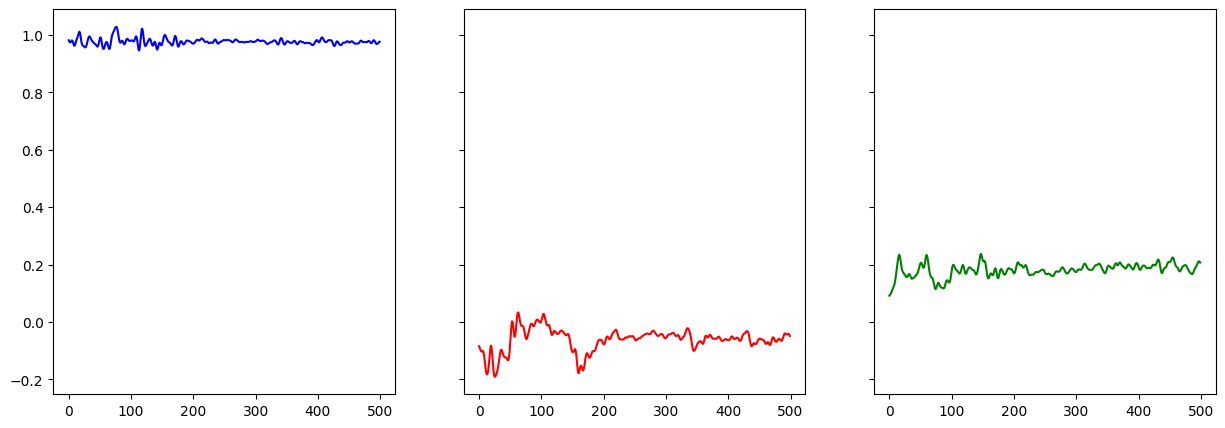

Data 2

Filtered Data



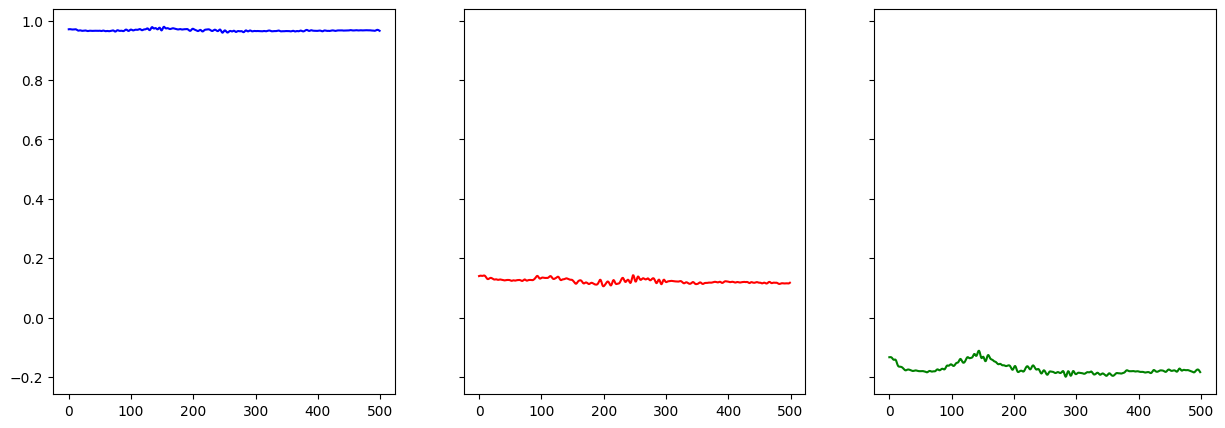

Data 3

Filtered Data



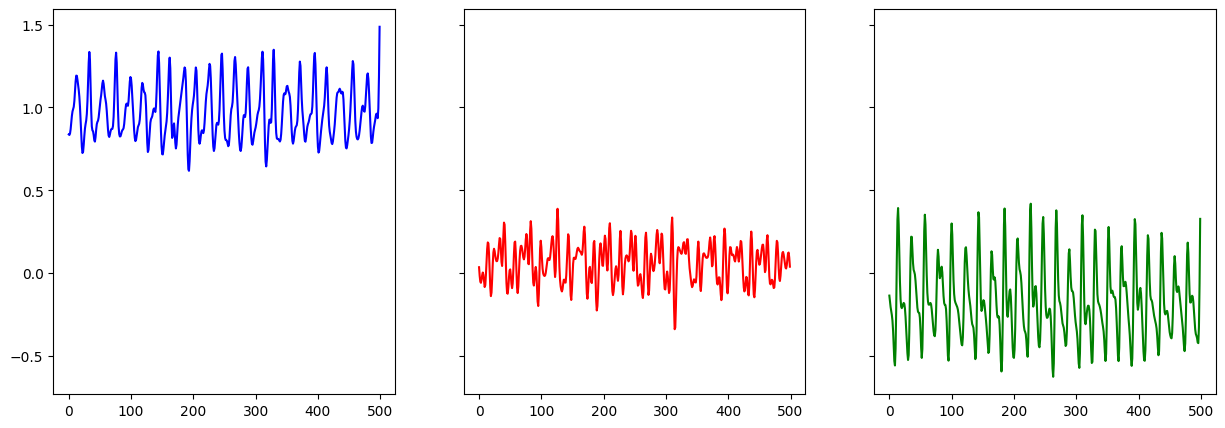

Data 4

Filtered Data



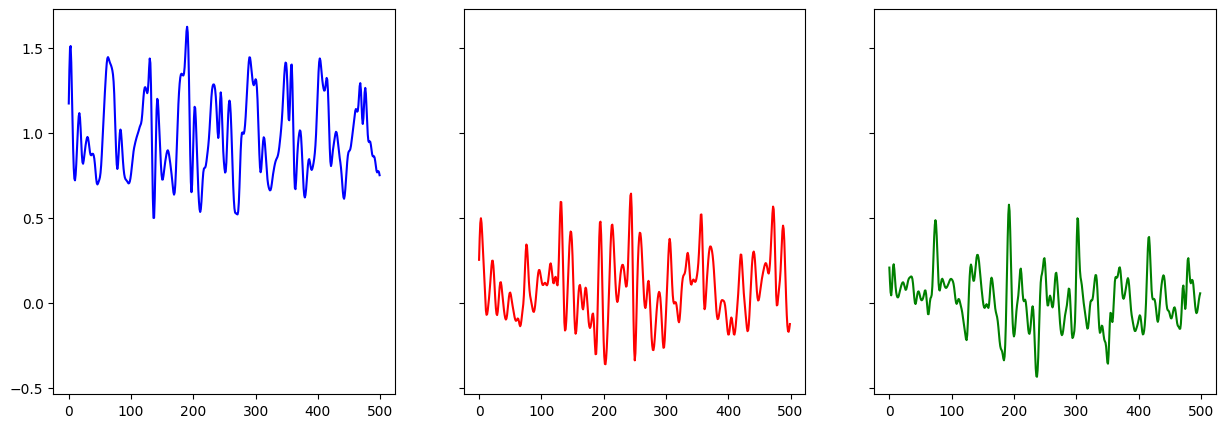

Data 5

Filtered Data



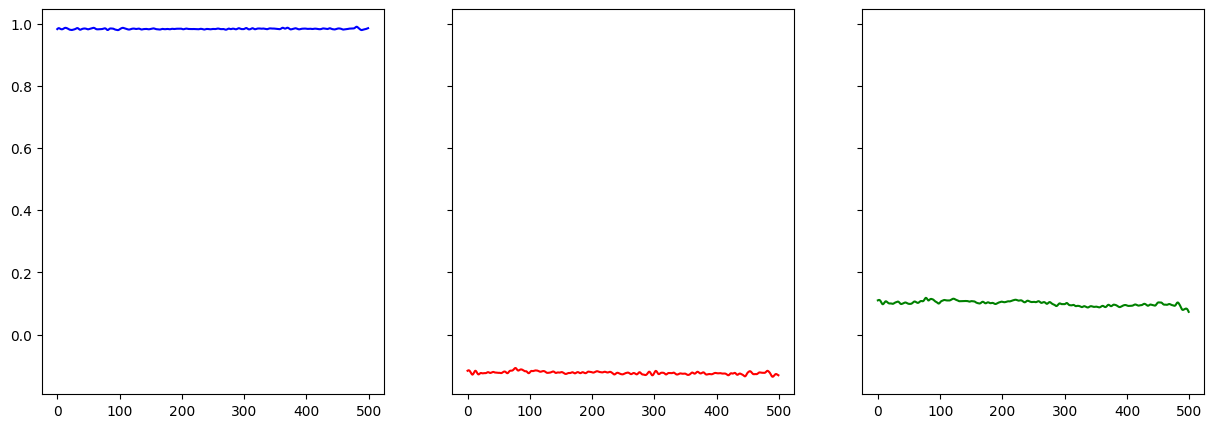

Data 6

Filtered Data



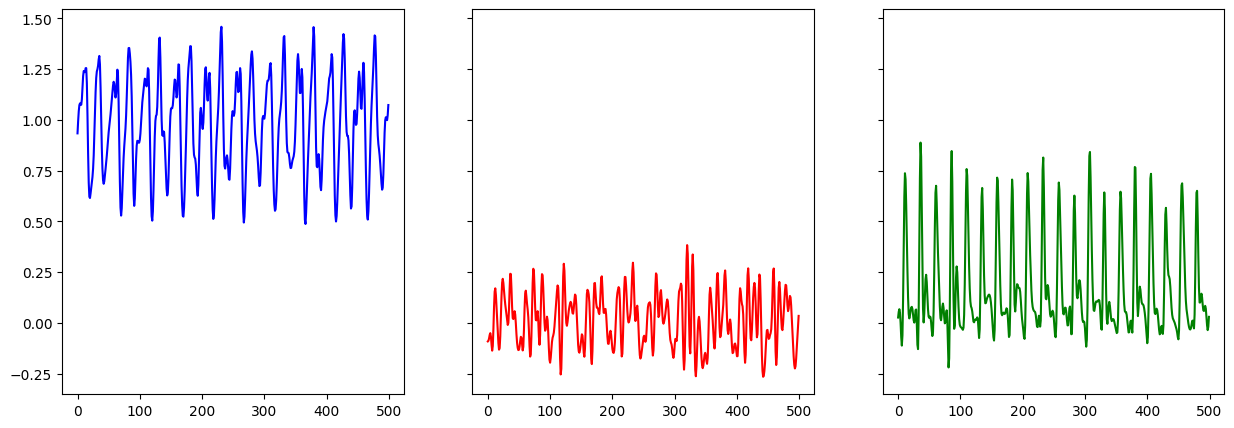

Data 7

Filtered Data



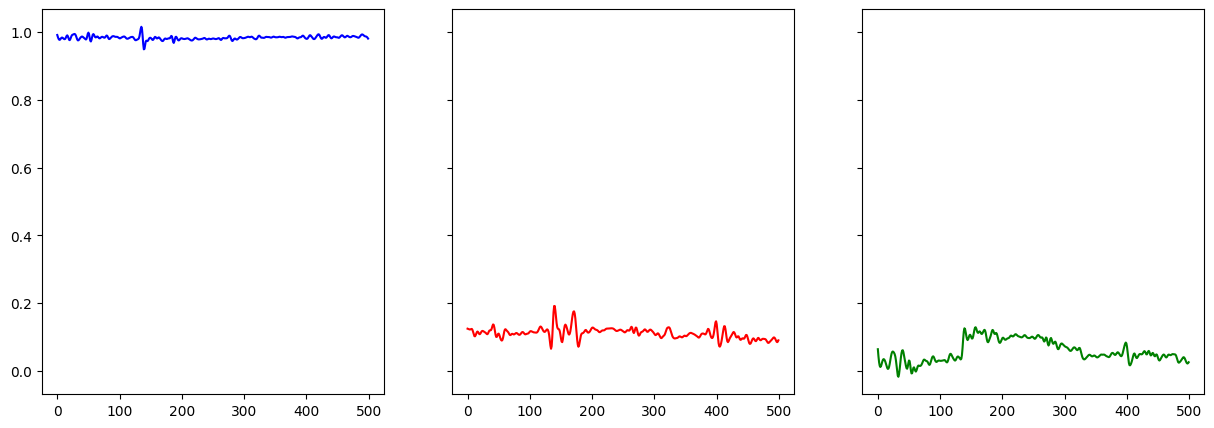

Data 8

Filtered Data



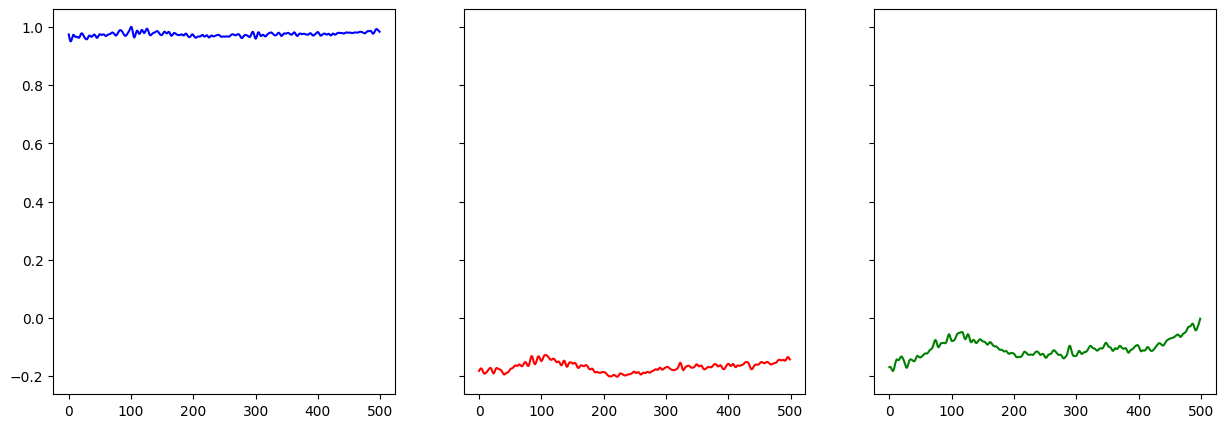

Data 9

Filtered Data



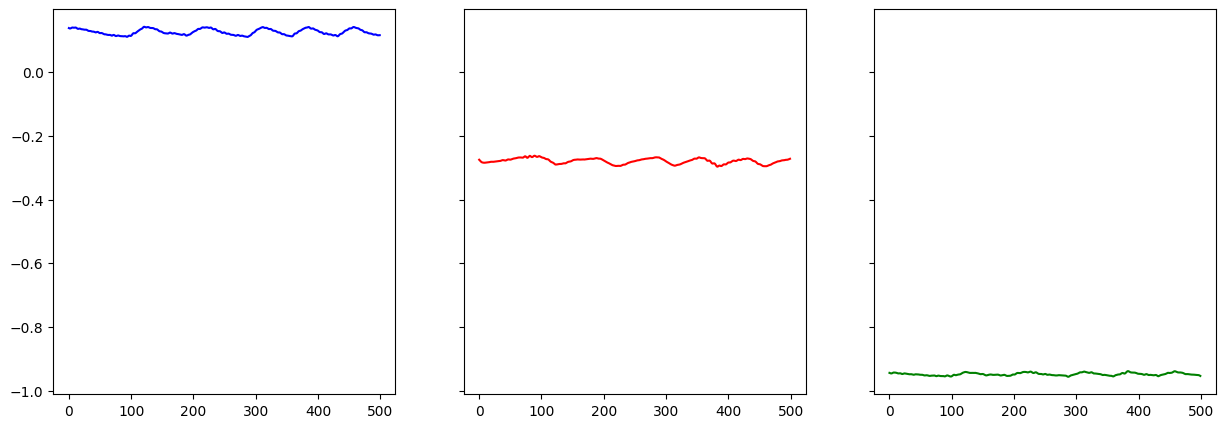

Data 10

Filtered Data



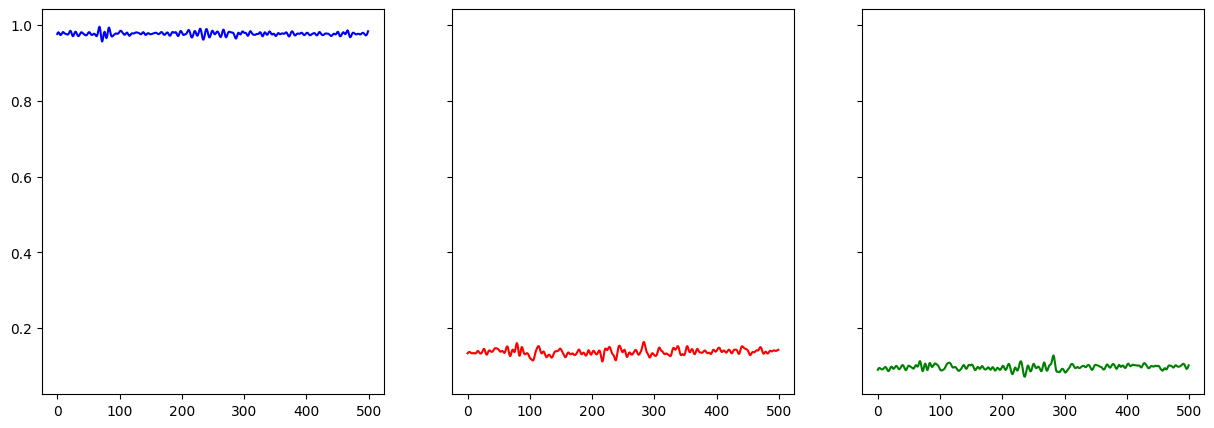

Data 11

Filtered Data



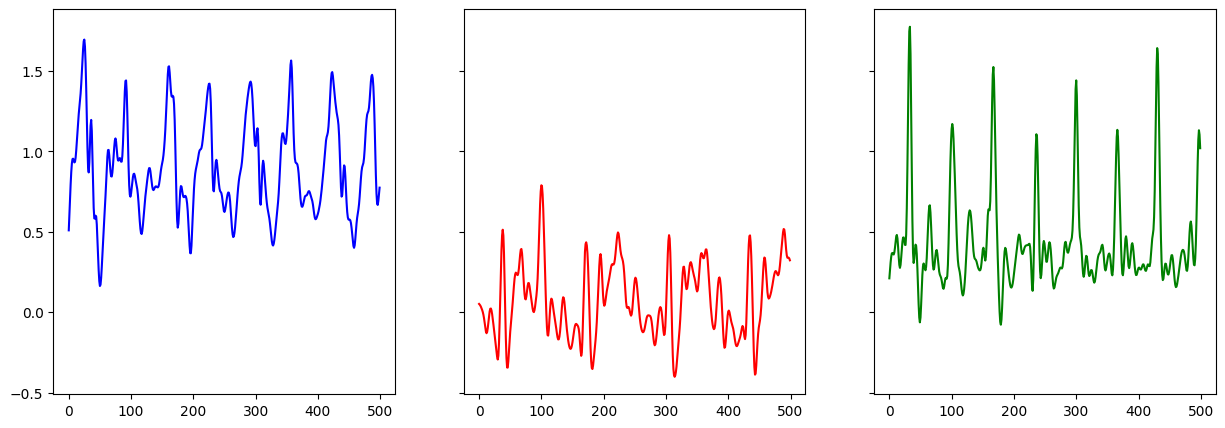

Data 12

Filtered Data



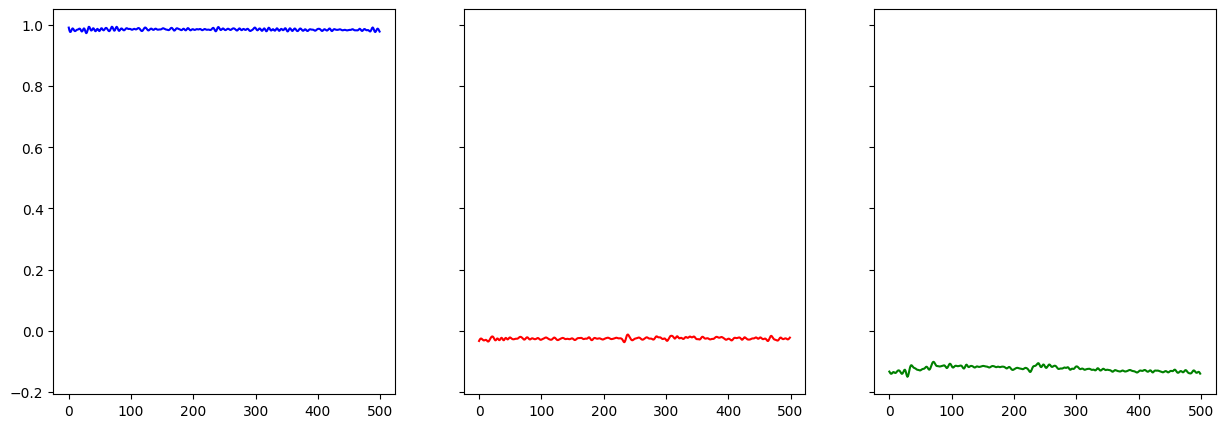

Data 13

Filtered Data



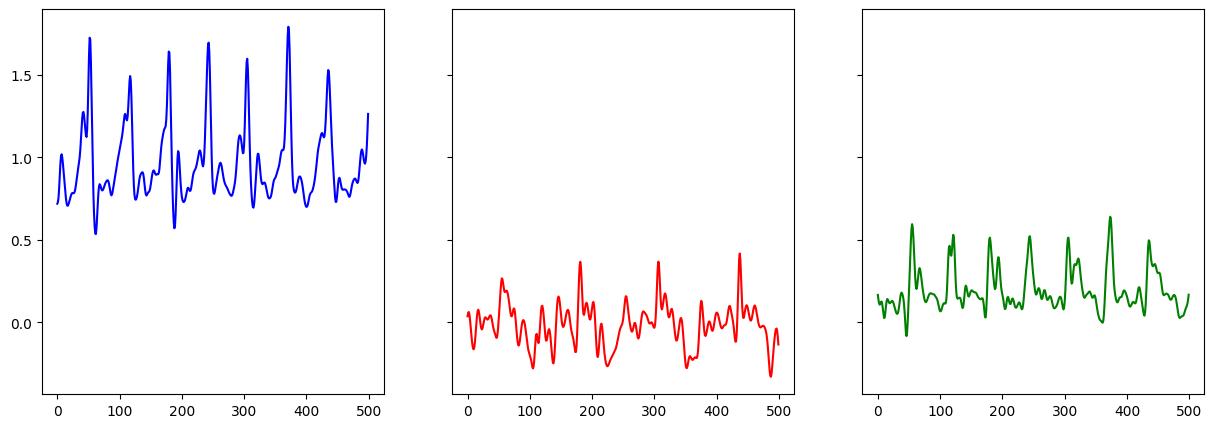

Data 14

Filtered Data



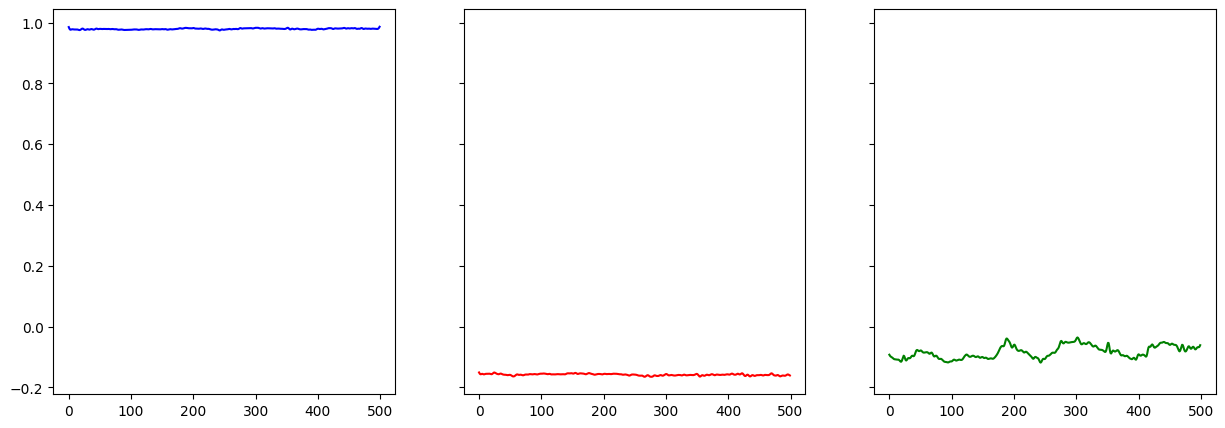

Data 15

Filtered Data



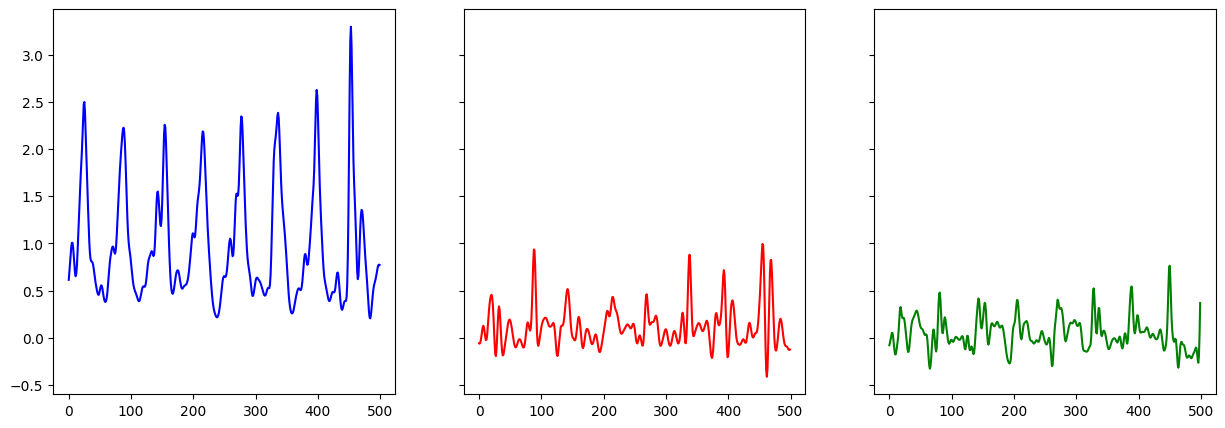

Data 16

Filtered Data



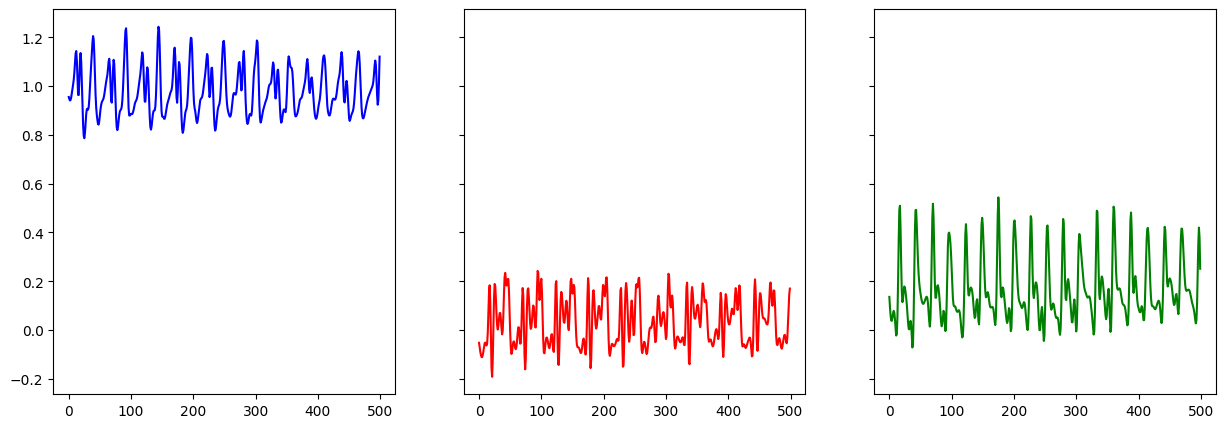

Data 17

Filtered Data



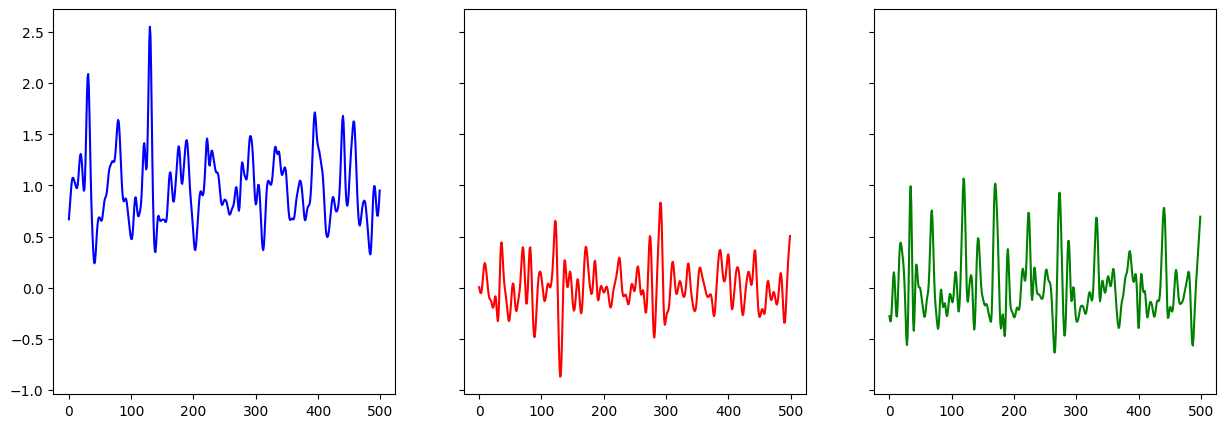

Data 18

Filtered Data



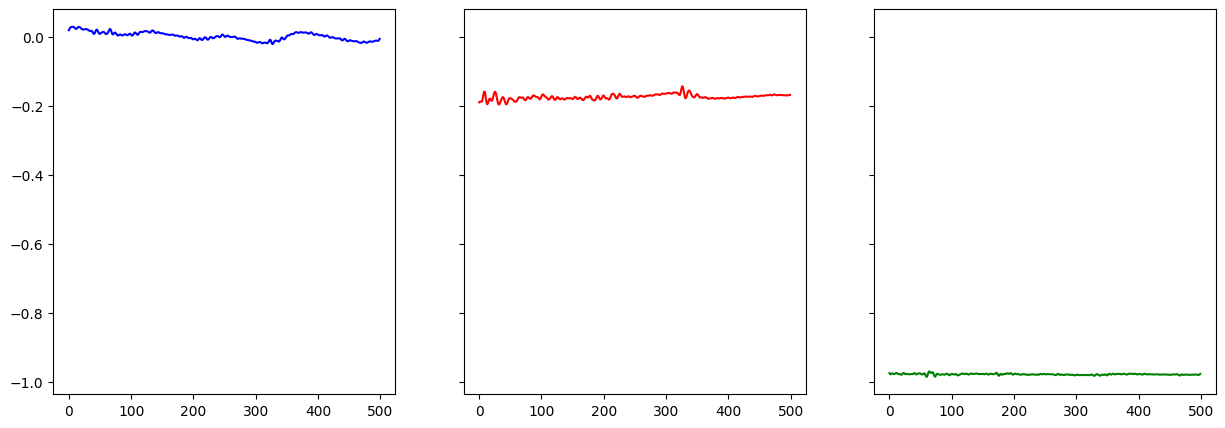

Data 19

Filtered Data



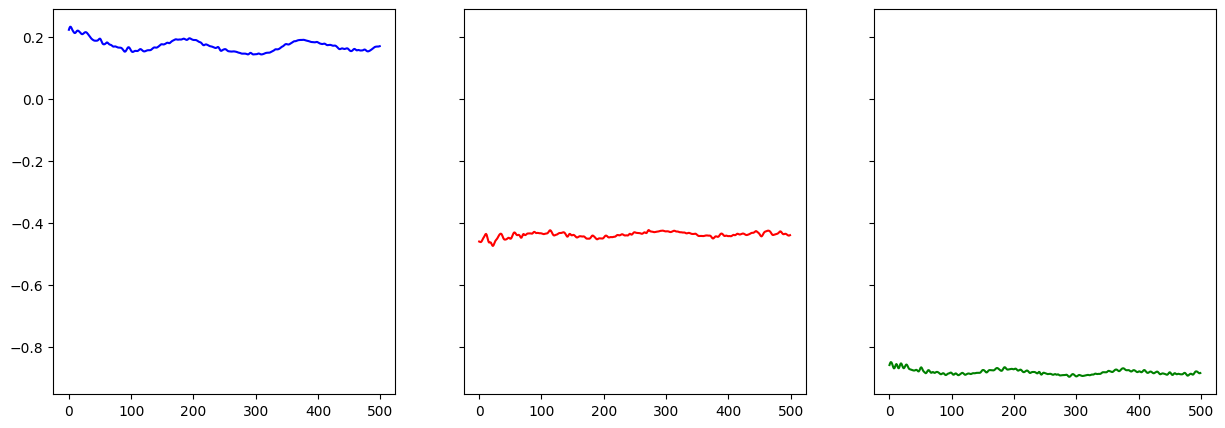

Data 20

Filtered Data



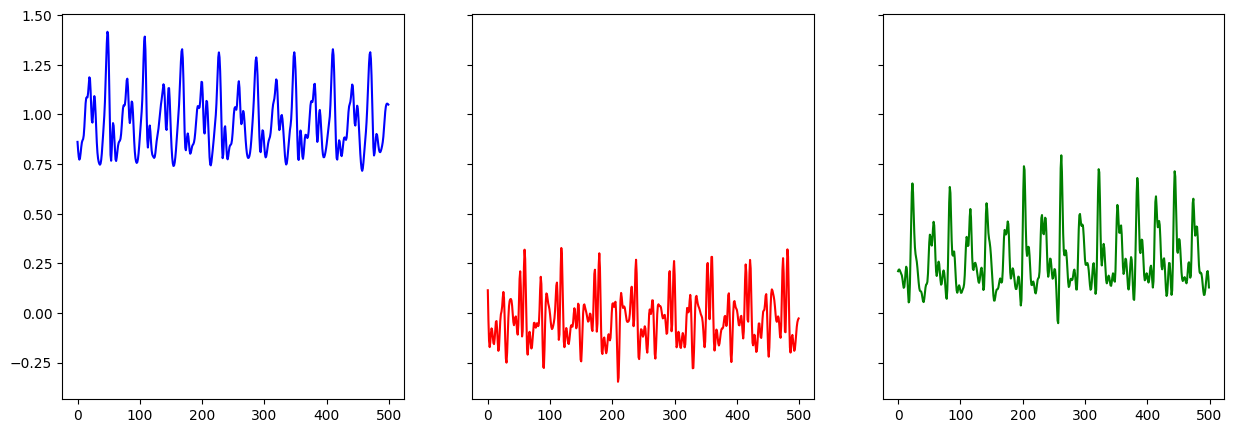

Data 21

Filtered Data



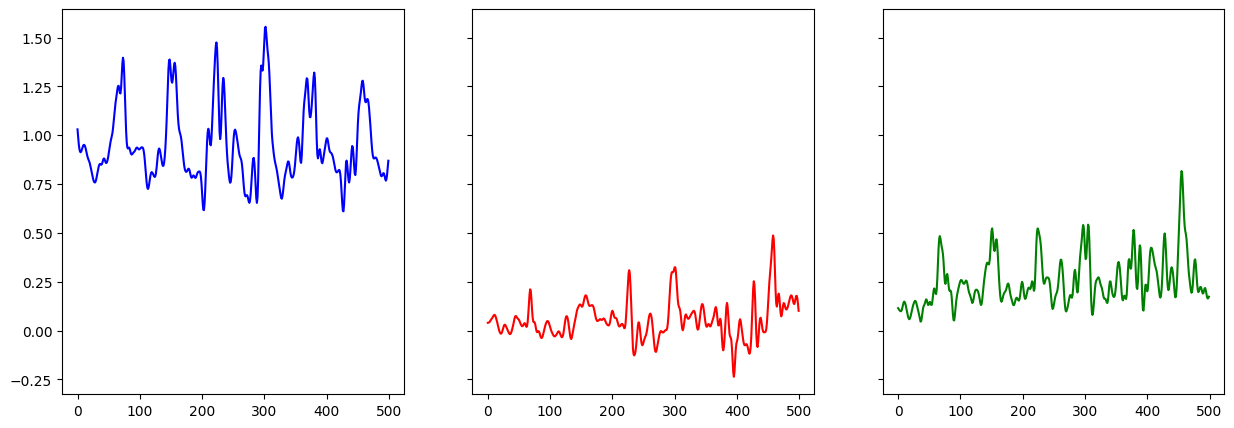

Data 22

Filtered Data



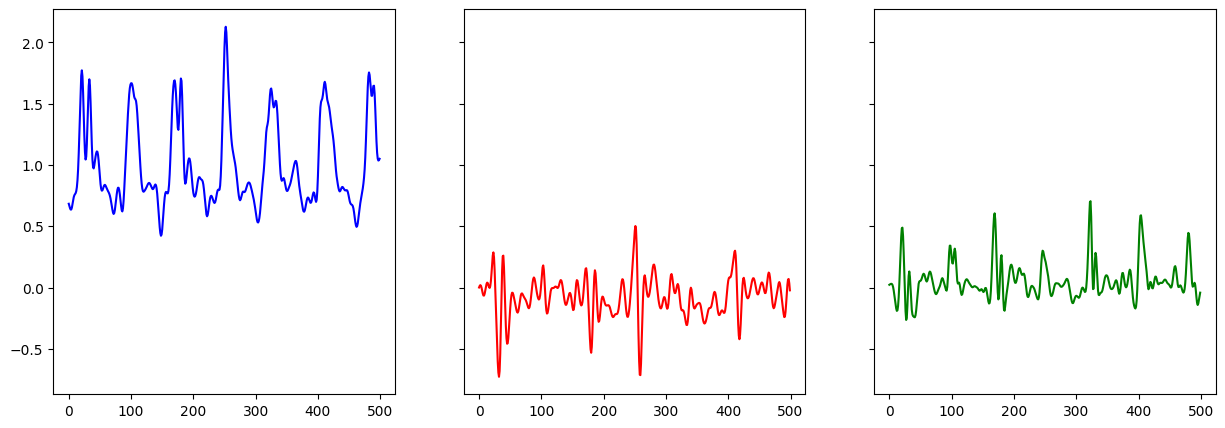

Data 23

Filtered Data



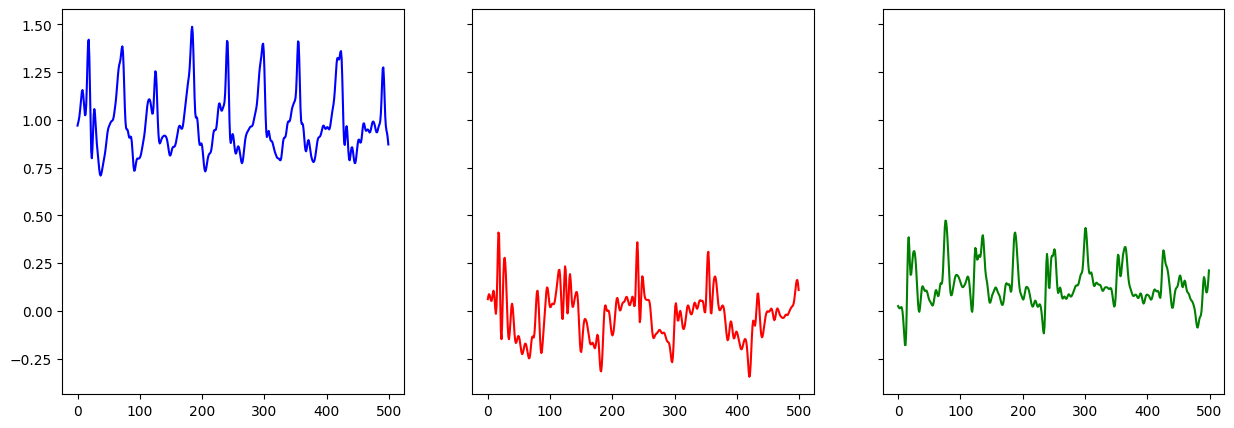

Data 24

Filtered Data



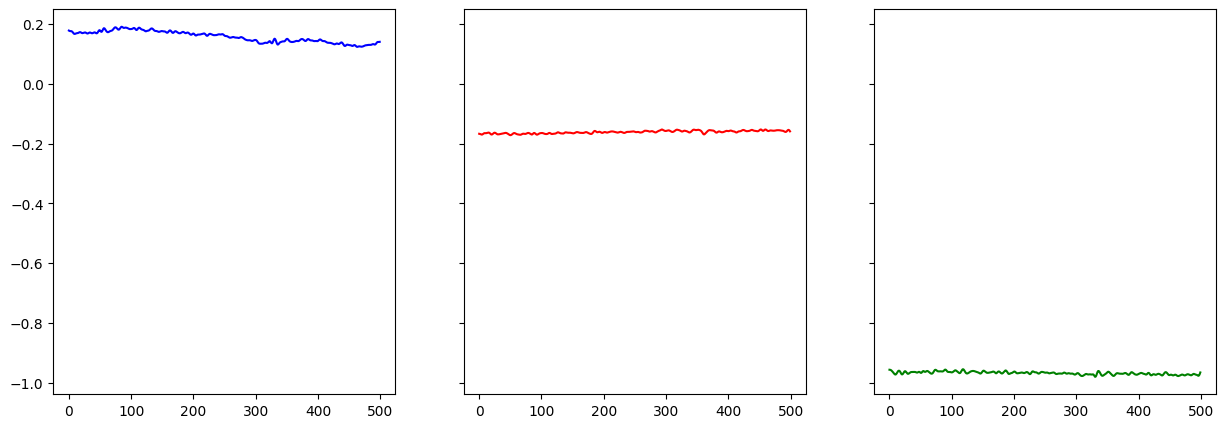

In [12]:
directory_path = "./Data"
for i,file in enumerate(os.listdir(directory_path)):
    df = pd.read_csv(f"./Data/{file}")
    data = df[["gFx","gFy","gFz"]]
    print(f"Data {i+1}\n")

    with open("./RawProcessedData/y_data_test.txt", "a") as output_file:
        if (file.startswith("WU")):
                output_file.write("2\n")
        elif (file.startswith("WD")):
                output_file.write("3\n")
        elif (file.startswith("W")):
                output_file.write("1\n")
        elif (file.startswith("Sit")):
                output_file.write("4\n")
        elif (file.startswith("S")):
                output_file.write("5\n")
        elif (file.startswith("L")):
                output_file.write("6\n")
        else:
            pass
            
    resampled_data = pd.DataFrame()
    for column in data.columns:
        resampled_data[column] = resample(data[column],1000)

    trimmed_data = trim_data(resampled_data)

    trimmed_data_array = np.array(trimmed_data)
    with open("./RawProcessedData/X_data_test_raw.txt", 'a') as file:
        np.savetxt(file, trimmed_data_array.flatten().reshape(1,-1), delimiter=' ', fmt='%f')

    b, a = butter(N=3, Wn=0.3, btype='low')
    filtered_data = pd.DataFrame()    
    for column in data.columns:
        filtered_data[column] = filtfilt(b, a, trimmed_data[column])
    print("Filtered Data\n")
    plot(filtered_data)

    filtered_data_array = np.array(filtered_data)
    with open("./FilteredData/X_data_test.txt", 'a') as out_file:
        np.savetxt(out_file, filtered_data_array.flatten().reshape(1,-1), delimiter=' ', fmt='%f')
    